# CW CMF SOL-EUR April 2022

In [146]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import scipy.stats as si
from mpl_toolkits.mplot3d import Axes3D


### Downloaded SOLANA historical data

In [147]:
data = yf.download('SOL-EUR', start="2021-03-22", end="2022-03-22")   #downloaded one-year historical daily data for Solana from Yahoo Finance

[*********************100%***********************]  1 of 1 completed


## Summary Statistics

In [148]:
data.describe().round(2)    # data description will all relevant information, output figures rounded to two decimals

,Open,High,Low,Close,Adj Close,Volume
count,366.00,366.00,366.00,366.00,366.00,3.660000e+02
mean,88.40,92.75,84.00,88.53,88.53,1.744368e+09
std,60.12,62.19,57.43,59.91,59.91,1.603350e+09
min,11.06,11.60,10.50,11.06,11.06,9.018257e+07
25%,30.35,32.55,28.06,30.61,30.61,4.699021e+08
50%,80.44,83.62,77.69,80.65,80.65,1.510754e+09
75%,137.85,144.89,130.94,137.52,137.52,2.380385e+09
max,224.02,225.13,212.98,224.16,224.16,1.441061e+10


In [149]:
data.head() # first five values of data from 22nd March to 26th March 2021

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-03-22,12.075573,13.919608,11.954044,12.503457,12.503457,218732977
2021-03-23,12.444227,12.777795,11.818958,11.996818,11.996818,90182569
2021-03-24,11.984627,12.993394,11.564862,11.564862,11.564862,100580779
2021-03-25,11.555795,11.599096,10.689075,11.060941,11.060941,98743578
2021-03-26,11.056222,12.552161,10.501455,12.531072,12.531072,127170198


In [150]:
data.tail()    # last five values of historical data from 18th to 22nd March 2022

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-03-18,79.164871,83.066055,76.664597,81.175224,81.175224,2481072879
2022-03-19,81.173805,85.277145,80.787148,83.521423,83.521423,1763794294
2022-03-20,83.517372,83.537483,79.664566,80.247490,80.247490,1164691723
2022-03-21,80.238564,82.321884,78.932770,80.564911,80.564911,1450992318
2022-03-22,80.551025,85.011612,80.149681,82.064125,82.064125,1704284033


In [151]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2021-03-22 to 2022-03-22
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       366 non-null    float64
 1   High       366 non-null    float64
 2   Low        366 non-null    float64
 3   Close      366 non-null    float64
 4   Adj Close  366 non-null    float64
 5   Volume     366 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 20.0 KB


In [152]:
ADJ = data['Adj Close']   # set a code name ADJ with value equal to the data Adjust Close price 

In [153]:
ADJ.describe().round(2)     #statistical description of Adj Close price

count    366.00
mean      88.53
std       59.91
min       11.06
25%       30.61
50%       80.65
75%      137.52
max      224.16
Name: Adj Close, dtype: float64

In [154]:
rets = np.log(ADJ / ADJ.shift(1))   #daily return of Solana
rets.head().round(4)

Date
2021-03-22       NaN
2021-03-23   -0.0414
2021-03-24   -0.0367
2021-03-25   -0.0446
2021-03-26    0.1248
Name: Adj Close, dtype: float64

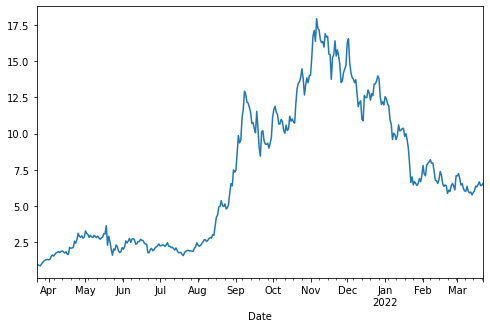

In [155]:
rets.cumsum().apply(np.exp).plot(figsize=(8, 5));   #cumsum of the log returns plotted

(<AxesSubplot:xlabel='Date'>,)

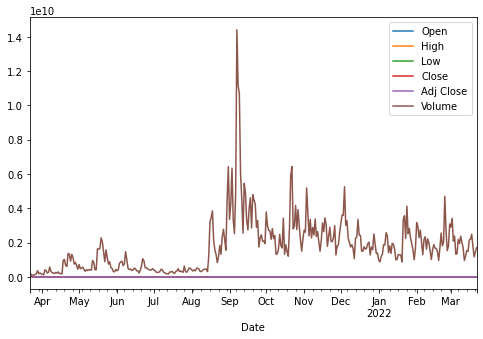

In [156]:
data.plot(figsize=(8, 5)),

In [157]:
normal_return = []         # calculation of the normal daily returns by using numpy
for i in range(0,len(data)-1):
    adjclose_yesterday = data.iloc[i]['Adj Close']
    adjclose_today = data.iloc[i+1]['Adj Close']
    x = (adjclose_today - adjclose_yesterday) / adjclose_yesterday
    normal_return.append(x)
normal_return[:5]

[-0.040519952024376804,
 -0.03600582690591693,
 -0.04357349857178045,
 0.13291192445886388,
 0.116980260173286]

In [158]:
log_return = []                   # calculation of the log-returns by using numpy
for i in range(0,len(data)-1):
    adjclose_yesterday = data.iloc[i]['Adj Close']
    adjclose_today = data.iloc[i+1]['Adj Close']
    y = np.log(adjclose_today / adjclose_yesterday)
    log_return.append(y)
log_return[:5]

[-0.04136375793961716,
 -0.03667002889807212,
 -0.04455133421660524,
 0.12479124244775891,
 0.11062884774942797]

### Volatility

In [159]:
datanr = pd.DataFrame(normal_return, columns = ['normal']) 
nr = datanr.mean() * len(datanr)
nv = datanr.std() * (len(datanr) ** 0.5)
print('The annulized normal return is %.8f and its annulized volatility is %.8f' % (nr,nv))

The annulized normal return is 2.88733297 and its annulized volatility is 1.41779812


In [160]:
datalr = pd.DataFrame(log_return, columns = ['log']) 
lr = datalr.mean() * len(datalr)
lv = datalr.std() * (len(datalr) ** 0.5)
print('The annulized log return is %.8f and its annulized volatility is %.8f' % (lr,lv))

The annulized log return is 1.88149578 and its annulized volatility is 1.41868539


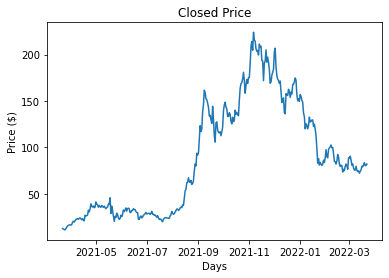

In [161]:
fig = plt.figure()  #daily closed price plotted
plt.plot(data['Close'])
plt.xlabel('Days')
plt.ylabel('Price ($)')
plt.title('Closed Price');

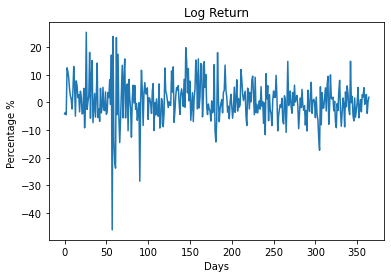

In [162]:
fig = plt.figure()             #daily log return plotted
plt.plot(datalr * 100)
plt.xlabel('Days')
plt.ylabel('Percentage % ')
plt.title('Log Return');

## Data Input

In [163]:
S0 = data['Adj Close'][-1]    # spot stock price from the last day Adj Close price, date 22/03/22
K = 90              # strike, randomly chosen
T = 1/52                # maturity, 1 week
r = 0.0156             # risk free rate, 12 months Yield US bond, accessed on 01.03 from Bloomberg, 1.56%
sig = 1.42               # diffusion coefficient or volatility,taken from the above calculated volatility of log returns, 142%
N = 3                   # number of periods or number of time steps, 3
payoff = "call"          # payoff 

print('The spot price is', round(S0,2))

The spot price is 82.06


## Step 1: Create the binomial price tree

In [164]:
dT = float(T) / N                             # Delta t
u = np.exp(sig * np.sqrt(dT))                 # up factor
d = 1.0 / u                                   # down factor 


In [165]:
S = np.zeros((N + 1, N + 1))
S[0, 0] = S0
z = 1
for t in range(1, N + 1):
    for i in range(z):
        S[i, t] = S[i, t-1] * u
        S[i+1, t] = S[i, t-1] * d
    z += 1

In [166]:
S

array([[ 82.06412506,  91.94512611, 103.01585753, 115.41956982],
       [  0.        ,  73.24499848,  82.06412506,  91.94512611],
       [  0.        ,   0.        ,  65.37363066,  73.24499848],
       [  0.        ,   0.        ,   0.        ,  58.34816949]])

In [167]:
a = np.exp(r * dT)    # risk free compound return  
p = (a - d)/ (u - d)  # risk neutral up probability
q = 1.0 - p           # risk neutral down probability
p

0.47204669290106355

## Step 2: Find option value at each final node

In [168]:
S_T = S[:,-1]
V = np.zeros((N + 1, N + 1))
if payoff =="call":
    V[:,-1] = np.maximum(S_T-K, 0.0)
elif payoff =="put":
    V[:,-1] = np.maximum(K-S_T, 0.0)
V

array([[ 0.        ,  0.        ,  0.        , 25.41956982],
       [ 0.        ,  0.        ,  0.        ,  1.94512611],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ]])

## Step 3: Find option value at earlier nodes

### European Option

In [169]:
# for European Option
for j in range(N-1, -1, -1):
    for i in range(j+1):
        V[i,j] = np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1])
V

array([[ 3.35924647,  6.6323906 , 13.02485708, 25.41956982],
       [ 0.        ,  0.43334204,  0.91809853,  1.94512611],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ]])

In [170]:
print('European ' + payoff, str( V[0,0]))

European call 3.359246468599609


# Monte Carlo Simulation

In [171]:
def mcs_simulation_np(m,n):       #m is the number of steps and n is the number of simulation
    M = m
    I = n
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sig ** 2 / 2) * dt + sig * np.sqrt(dt) * rn[t]) 
    return S

In [172]:
S = mcs_simulation_np(7,10000)     # simulate n = 10000 steps for the asset price with M = 7 steps

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-period values')

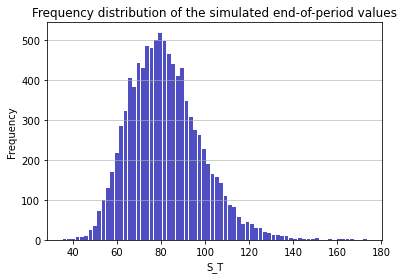

In [173]:
n, bins, patches = plt.hist(x=S[-1,:], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('S_T')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-period values')

In [174]:
c = np.mean(np.maximum(S[-1,:] - K,0))
print('European call', str(c))

European call 3.482285095964637


# Black-Scholes Model

### European Option, no dividend paid

In [175]:
def euro_option_bs(S, K, T, r, vol, payoff):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: risk free rate
    #vol: volatility of underlying asset
    #payoff: call or put
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        option_value = S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        option_value = - S * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value

In [176]:
euro_option_bs(82.06, 90, 1/52, 0.0156, 1.42, 'call')     #price for the BS call

3.5111027736515474

In [177]:
S = np.linspace(70,100,11)
cp = np.zeros((len(S),1))
for i in range(len(S)):
    cp[i] = euro_option_bs(S[i], 90, 1/52, 0.0156, 1.42, 'call')

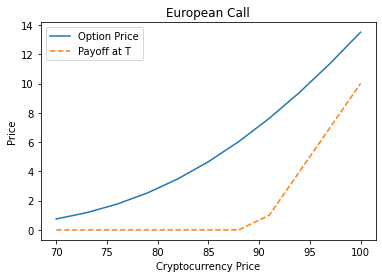

In [178]:
fig = plt.figure()
plt.plot(S, cp, '-')
plt.plot(S, np.maximum(S-90,0), '--')
plt.xlabel('Cryptocurrency Price')
plt.ylabel('Price')
plt.title('European Call')
plt.legend(['Option Price','Payoff at T'])

# GREEKS


# Delta

In [179]:
def delta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))

    if payoff == "call":
        delta = np.exp(- q * T) * si.norm.cdf(d1, 0.0, 1.0)
    elif payoff == "put":
        delta =  - np.exp(- q * T) * si.norm.cdf(- d1, 0.0, 1.0)
    
    return delta

In [180]:
S = np.linspace(70, 100, 51)                 #The range of cypto price goes from 70 euros to 100 euros (51 points) and the time
                                             # to expiry (T) from 1/365 to 1 week (51 point)
T = np.linspace(1/365, 1/52, 51)
Delta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Delta[i,j] = delta(S[j], 90, T[i], 0.0156, 0.0, 1.42, 'call')

C:\Users\LENOVO\AppData\Local\Temp/ipykernel_7224/743355234.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


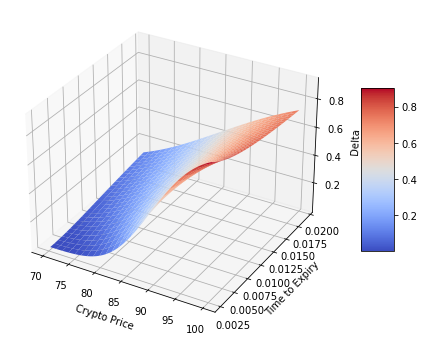

In [181]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Delta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Crypto Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Delta')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [182]:
d = delta(82.06, 90, 1/52, 0.0156, 0.0, 1.42, 'call')
print('The value of Delta is', d.round(4),'.','If the stock price increase 1 euro, then the value of the option will increase euros', d.round(4), '.')


The value of Delta is 0.356 . If the stock price increase 1 euro, then the value of the option will increase euros 0.356 .


# Gamma

In [183]:
def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(- r * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))
    
    return gamma

In [184]:
S = np.linspace(70, 100, 51)                 #The range of cypto price goes from 70 euros to 100 euros (51 points) and the time
                                             # to expiry (T) from 1/365 to 1 week (51 point)
T = np.linspace(1/365, 1/52, 51)
Gamma = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Gamma[i,j] = gamma(S[j], 90, T[i], 0.0156, 0.0, 1.42, 'call')

C:\Users\LENOVO\AppData\Local\Temp/ipykernel_7224/1922918594.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


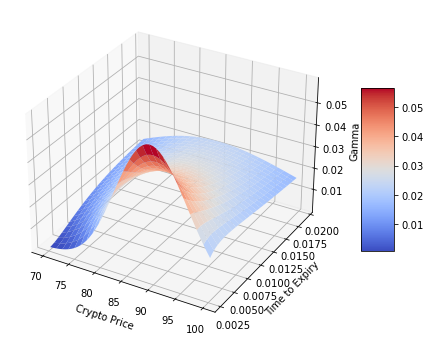

In [185]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Gamma, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Crypto Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Gamma')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [186]:
gamma(82.06, 90, 1/52, 0.0156, 0.0, 1.42, 'call')

0.023056237986207657

# Speed

In [187]:
def speed(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    speed = - np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / ((vol **2) * (S**2) * np.sqrt(T)) * (d1 + vol * np.sqrt(T))
    
    return speed

In [188]:
S = np.linspace(70, 100, 51)                 #The range of cypto price goes from 70 euros to 100 euros (51 points) and the time
                                             # to expiry (T) from 1/365 to 1 week (51 point)
T = np.linspace(1/365, 1/52, 51)
Speed = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Speed[i,j] = speed(S[j], 90, T[i], 0.0156, 0.0, 1.42, 'call')

C:\Users\LENOVO\AppData\Local\Temp/ipykernel_7224/3084007888.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


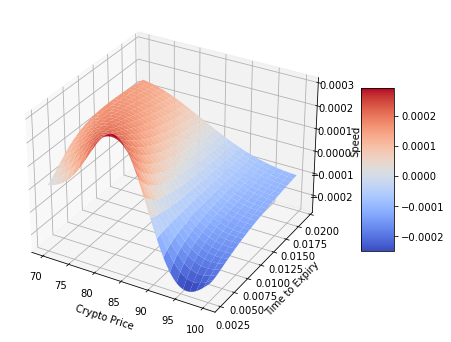

In [189]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Speed, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Crypto Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Speed')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [190]:
speed(82.06, 90, 1/52, 0.0156, 0.0, 1.42, 'call')

3.406668604785704e-05

# Theta

In [191]:
def theta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        theta = vol * S * np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        theta = vol * S * np.exp(- q * T) * si.norm.pdf(-d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta

In [192]:
S = np.linspace(70, 100, 51)                 #The range of cypto price goes from 70 euros to 100 euros (51 points) and the time
                                             # to expiry (T) from 1/365 to 1 week (51 point)
T = np.linspace(1/365, 1/52, 51)
Theta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Theta[i,j] = theta(S[j], 90, T[i], 0.0156, 0.0, 1.42, 'call')

C:\Users\LENOVO\AppData\Local\Temp/ipykernel_7224/2883061110.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


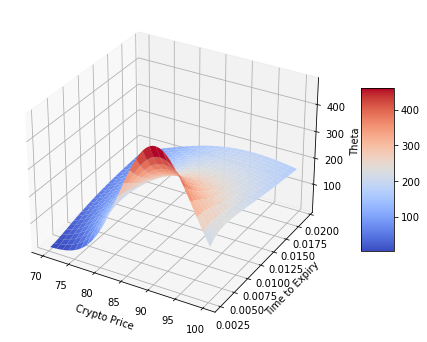

In [193]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Theta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Crypto Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Theta')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [194]:
theta(82.06, 90, 1/52, 0.0156, 0.0, 1.42, 'call')

156.9781935617147

# Rho

In [195]:
def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho

In [196]:
S = np.linspace(70, 100, 51)                 #The range of cypto price goes from 70 euros to 100 euros (51 points) and the time
                                             # to expiry (T) from 1/365 to 1 week (51 point)
T = np.linspace(1/365, 1/52, 51)
Rho = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Rho[i,j] = rho(S[j], 90, T[i], 0.0156, 0.0, 1.42, 'call')

C:\Users\LENOVO\AppData\Local\Temp/ipykernel_7224/298383028.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


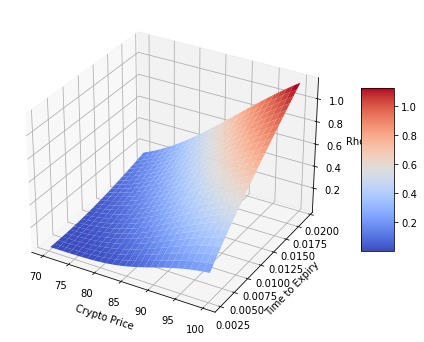

In [197]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Rho, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Crypto Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Rho')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [198]:
rho(82.06, 90, 1/52, 0.0156, 0.0, 1.42, 'call')

0.49435234967003033